In [1]:
datafile ="../OriginData/Hd/filter_xy.csv"

In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
# from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
df = pd.read_csv(datafile)
df

,婚姻状况(已婚1未婚离异丧偶0),文化程度(小学0初中1高中2职校3大专4硕士5),BMI,总胆红素:血液:μmol/L,K00-K93消化系统疾病,肌酐:血液:μmol/L,宗教信仰,平均血红蛋白浓度:血液:g/L,性别(男1女0),首次透析年龄,...,atc_S,C00-D48肿瘤,D50-D89血液及造血器官疾病和涉及免疫机制的某些疾患,E00-E90内分泌、营养和代谢疾病,F00-F99精神和行为障碍,G00-G99神经系统疾病,I00-I99循环系统疾病,J00-J99呼吸系统疾病,N00-N99泌尿生殖系统疾病,y
0,1.0000,4.0000,0.000000,0.056338,0,0.126761,0.0000,0.154930,0.0,71.87,...,1,0,1,1,0,0,1,1,1,0
1,1.0000,0.0000,0.000000,0.000000,0,0.428571,1.0000,0.142857,0.0,55.95,...,0,0,0,0,0,0,0,0,1,0
2,1.0000,0.0000,0.049822,0.053381,1,0.138790,0.0000,0.131673,1.0,82.03,...,1,0,1,0,0,0,1,0,1,1
3,0.8508,1.4484,0.000000,0.088235,0,0.132353,0.1218,0.088235,1.0,35.51,...,1,0,1,0,0,0,1,0,1,0
4,0.8508,1.4484,0.000000,0.000000,0,0.065217,0.1218,0.369565,1.0,63.24,...,1,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1.0000,1.0000,0.101449,0.072464,0,0.130435,0.0000,0.094203,1.0,64.34,...,1,0,0,1,0,1,0,0,1,0
1225,0.0000,2.0000,0.800000,0.044444,0,0.133333,0.0000,0.088889,0.0,19.33,...,1,0,1,0,0,0,1,1,1,0
1226,1.0000,4.0000,0.000000,0.056338,0,0.211268,0.0000,0.084507,1.0,41.36,...,0,0,0,0,0,0,0,0,1,0
1227,0.0000,2.0000,0.471154,0.057692,0,0.086538,0.0000,0.076923,0.0,18.03,...,1,0,1,0,0,1,1,0,1,0


In [4]:
len(df[df["y"]==1])

36

In [5]:
df = df.dropna()
# df = df.drop(df[df["gender"]=="Other"].index)
# df = df.drop(df[df["work_type"]=="Never_worked"].index)

In [6]:
df["性别(男1女0)"].value_counts()

1.0    799
0.0    430
Name: 性别(男1女0), dtype: int64

In [7]:
for col in df.select_dtypes(["int64"]).columns:
    print(df[col].value_counts())

0    849
1    380
Name: K00-K93消化系统疾病, dtype: int64
1    1128
0     101
Name: atc_A, dtype: int64
1    1135
0      94
Name: atc_B, dtype: int64
1    1089
0     140
Name: atc_C, dtype: int64
0    675
1    554
Name: atc_G, dtype: int64
0    1039
1     190
Name: atc_H, dtype: int64
1    736
0    493
Name: atc_J, dtype: int64
1    973
0    256
Name: atc_M, dtype: int64
1    936
0    293
Name: atc_N, dtype: int64
1    1000
0     229
Name: atc_S, dtype: int64
0    1118
1     111
Name: C00-D48肿瘤, dtype: int64
1    785
0    444
Name: D50-D89血液及造血器官疾病和涉及免疫机制的某些疾患, dtype: int64
0    795
1    434
Name: E00-E90内分泌、营养和代谢疾病, dtype: int64
0    1205
1      24
Name: F00-F99精神和行为障碍, dtype: int64
0    1131
1      98
Name: G00-G99神经系统疾病, dtype: int64
1    951
0    278
Name: I00-I99循环系统疾病, dtype: int64
0    984
1    245
Name: J00-J99呼吸系统疾病, dtype: int64
1    1195
0      34
Name: N00-N99泌尿生殖系统疾病, dtype: int64
0    1193
1      36
Name: y, dtype: int64


In [8]:
# for col in df.columns:
# #     df.drop(df[df[i]=="Unknown"].index,inplace=True)
#     df[col] = LabelEncoder().fit_transform(df[col].values )

In [9]:
# df.drop("id",axis=1,inplace=True)
df

,婚姻状况(已婚1未婚离异丧偶0),文化程度(小学0初中1高中2职校3大专4硕士5),BMI,总胆红素:血液:μmol/L,K00-K93消化系统疾病,肌酐:血液:μmol/L,宗教信仰,平均血红蛋白浓度:血液:g/L,性别(男1女0),首次透析年龄,...,atc_S,C00-D48肿瘤,D50-D89血液及造血器官疾病和涉及免疫机制的某些疾患,E00-E90内分泌、营养和代谢疾病,F00-F99精神和行为障碍,G00-G99神经系统疾病,I00-I99循环系统疾病,J00-J99呼吸系统疾病,N00-N99泌尿生殖系统疾病,y
0,1.0000,4.0000,0.000000,0.056338,0,0.126761,0.0000,0.154930,0.0,71.87,...,1,0,1,1,0,0,1,1,1,0
1,1.0000,0.0000,0.000000,0.000000,0,0.428571,1.0000,0.142857,0.0,55.95,...,0,0,0,0,0,0,0,0,1,0
2,1.0000,0.0000,0.049822,0.053381,1,0.138790,0.0000,0.131673,1.0,82.03,...,1,0,1,0,0,0,1,0,1,1
3,0.8508,1.4484,0.000000,0.088235,0,0.132353,0.1218,0.088235,1.0,35.51,...,1,0,1,0,0,0,1,0,1,0
4,0.8508,1.4484,0.000000,0.000000,0,0.065217,0.1218,0.369565,1.0,63.24,...,1,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1.0000,1.0000,0.101449,0.072464,0,0.130435,0.0000,0.094203,1.0,64.34,...,1,0,0,1,0,1,0,0,1,0
1225,0.0000,2.0000,0.800000,0.044444,0,0.133333,0.0000,0.088889,0.0,19.33,...,1,0,1,0,0,0,1,1,1,0
1226,1.0000,4.0000,0.000000,0.056338,0,0.211268,0.0000,0.084507,1.0,41.36,...,0,0,0,0,0,0,0,0,1,0
1227,0.0000,2.0000,0.471154,0.057692,0,0.086538,0.0000,0.076923,0.0,18.03,...,1,0,1,0,0,1,1,0,1,0


In [10]:
onehotcol = []
con_col = []
for i in df.columns:
    print(i,len(np.unique(df[i].values)))
    if len(np.unique(df[i].values)) < 10 and len(np.unique(df[i].values)) > 1:
        onehotcol.append(i)
    elif len(np.unique(df[i].values)) >= 10:
        con_col.append(i)
        
# con_col = set(df.columns) - set(onehotcol)
print("con_col: ",con_col)
onehotcol.remove('y')
print("onehotcol: ",onehotcol)

婚姻状况(已婚1未婚离异丧偶0) 3
文化程度(小学0初中1高中2职校3大专4硕士5) 7
BMI 561
总胆红素:血液:μmol/L 297
K00-K93消化系统疾病 2
肌酐:血液:μmol/L 402
宗教信仰 3
平均血红蛋白浓度:血液:g/L 462
性别(男1女0) 2
首次透析年龄 1113
医疗付费方式(自费0有保1) 3
碱性磷酸酶:血液:U/L 304
甲状旁腺激素.:血清:pg/mL 283
钾:血液:mmol/L 454
标准碳酸氢盐SB:血液:mmol/L 211
糖化血红蛋白A1c:血液:g/L 1
尿葡萄糖二酸/肌酐:尿液:μmol/gCr 1
白蛋白.:血清:% 193
甘油三酯:血液:mmol/L 323
高密度脂蛋白-C:血液:mmol/L 314
低密度脂蛋白-C:血液:mmol/L 315
24小时尿白蛋白:尿液:mg/24h 2
尿蛋白肌酐比值:尿液:g/g 160
尿素氮/肌酐:血清: 382
尿酸:血液:μmol/L 524
吸烟 3
饮酒 3
atc_A 2
atc_B 2
atc_C 2
atc_G 2
atc_H 2
atc_J 2
atc_M 2
atc_N 2
atc_S 2
C00-D48肿瘤 2
D50-D89血液及造血器官疾病和涉及免疫机制的某些疾患 2
E00-E90内分泌、营养和代谢疾病 2
F00-F99精神和行为障碍 2
G00-G99神经系统疾病 2
I00-I99循环系统疾病 2
J00-J99呼吸系统疾病 2
N00-N99泌尿生殖系统疾病 2
y 2
con_col:  ['BMI', '总胆红素:血液:μmol/L', '肌酐:血液:μmol/L', '平均血红蛋白浓度:血液:g/L', '首次透析年龄', '碱性磷酸酶:血液:U/L', '甲状旁腺激素.:血清:pg/mL', '钾:血液:mmol/L', '标准碳酸氢盐SB:血液:mmol/L', '白蛋白.:血清:%', '甘油三酯:血液:mmol/L', '高密度脂蛋白-C:血液:mmol/L', '低密度脂蛋白-C:血液:mmol/L', '尿蛋白肌酐比值:尿液:g/g', '尿素氮/肌酐:血清:', '尿酸:血液:μmol/L']
onehotcol:  ['婚姻状况(已婚1未婚离异丧偶0)', '文化程度(小学0初中1高

In [11]:
len(np.unique(df['婚姻状况(已婚1未婚离异丧偶0)'].values))

3

In [12]:
Cols = [["D",len(np.unique(df[i].values))] for i in onehotcol]
Cols.append(["C",len(con_col)])
print(Cols)

[['D', 3], ['D', 7], ['D', 2], ['D', 3], ['D', 2], ['D', 3], ['D', 2], ['D', 3], ['D', 3], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 2], ['C', 16]]


In [13]:
df_cols = con_col+onehotcol+["y"]

In [14]:
len(con_col)

16

In [15]:
len(onehotcol)

26

In [16]:
len(df_cols)

43

In [17]:
df_onehot = df[onehotcol]
df_con = df[con_col]
label = ["y"]
y = df[label]

In [18]:
for col in onehotcol:
    df[col] = LabelEncoder().fit_transform(df[col].values )
#     df.loc[:, col] = LabelEncoder().fit_transform(df[col].values)
df_onehot = df[onehotcol]
df_onehot

,婚姻状况(已婚1未婚离异丧偶0),文化程度(小学0初中1高中2职校3大专4硕士5),K00-K93消化系统疾病,宗教信仰,性别(男1女0),医疗付费方式(自费0有保1),24小时尿白蛋白:尿液:mg/24h,吸烟,饮酒,atc_A,...,atc_N,atc_S,C00-D48肿瘤,D50-D89血液及造血器官疾病和涉及免疫机制的某些疾患,E00-E90内分泌、营养和代谢疾病,F00-F99精神和行为障碍,G00-G99神经系统疾病,I00-I99循环系统疾病,J00-J99呼吸系统疾病,N00-N99泌尿生殖系统疾病
0,2,5,0,0,0,0,0,0,0,1,...,1,1,0,1,1,0,0,1,1,1
1,2,0,0,2,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,1,0,1,0,0,2,2,1,...,1,1,0,1,0,0,0,1,0,1
3,1,2,0,1,1,0,0,1,1,1,...,1,1,0,1,0,0,0,1,0,1
4,1,2,0,1,1,2,0,1,1,1,...,0,1,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,2,1,0,0,1,2,0,0,0,1,...,1,1,0,0,1,0,1,0,0,1
1225,0,3,0,0,0,2,0,0,0,1,...,1,1,0,1,0,0,0,1,1,1
1226,2,5,0,0,1,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1227,0,3,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,1,1,0,1


In [19]:
df_ori =df[df_cols]

In [20]:
# list(df_onehot)

In [21]:
# onehotcol

## 对离散多标签数据进行one-hot

In [22]:
from sklearn.preprocessing import OneHotEncoder
# 创建 OneHotEncoder 对象
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
# 对指定列进行 One-Hot 编码
encoded_data = encoder.fit_transform(df_onehot)
# 获取编码后的特征名称
feature_names = encoder.get_feature_names_out(input_features=onehotcol)
# 创建编码结果的 DataFrame，并设置特征名称
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
encoded_df

/home/amax/.conda/envs/pytorch/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,婚姻状况(已婚1未婚离异丧偶0)_0,婚姻状况(已婚1未婚离异丧偶0)_1,婚姻状况(已婚1未婚离异丧偶0)_2,文化程度(小学0初中1高中2职校3大专4硕士5)_0,文化程度(小学0初中1高中2职校3大专4硕士5)_1,文化程度(小学0初中1高中2职校3大专4硕士5)_2,文化程度(小学0初中1高中2职校3大专4硕士5)_3,文化程度(小学0初中1高中2职校3大专4硕士5)_4,文化程度(小学0初中1高中2职校3大专4硕士5)_5,文化程度(小学0初中1高中2职校3大专4硕士5)_6,...,F00-F99精神和行为障碍_0,F00-F99精神和行为障碍_1,G00-G99神经系统疾病_0,G00-G99神经系统疾病_1,I00-I99循环系统疾病_0,I00-I99循环系统疾病_1,J00-J99呼吸系统疾病_0,J00-J99呼吸系统疾病_1,N00-N99泌尿生殖系统疾病_0,N00-N99泌尿生殖系统疾病_1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1225,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1226,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1227,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [23]:
restored_data = encoder.inverse_transform(encoded_data)
restored_df = pd.DataFrame(restored_data, columns=onehotcol)

In [24]:
# restored_df

In [25]:
exam = pd.DataFrame([])
for i in list(restored_df):
    exam[i] = restored_df[i]-df_onehot[i]
#判断还原矩阵df和原始矩阵df_ori是否相同或近似相同
np.isclose(exam,0).all()
#True 表示成功还原，还原矩阵和原矩阵几乎完全一样

True

## 连续值进行min-max

In [26]:
df_con

,BMI,总胆红素:血液:μmol/L,肌酐:血液:μmol/L,平均血红蛋白浓度:血液:g/L,首次透析年龄,碱性磷酸酶:血液:U/L,甲状旁腺激素.:血清:pg/mL,钾:血液:mmol/L,标准碳酸氢盐SB:血液:mmol/L,白蛋白.:血清:%,甘油三酯:血液:mmol/L,高密度脂蛋白-C:血液:mmol/L,低密度脂蛋白-C:血液:mmol/L,尿蛋白肌酐比值:尿液:g/g,尿素氮/肌酐:血清:,尿酸:血液:μmol/L
0,0.000000,0.056338,0.126761,0.154930,71.87,0.056338,0.000000,0.126761,0.000000,0.000000,0.056338,0.042254,0.070423,0.042254,0.084507,0.112676
1,0.000000,0.000000,0.428571,0.142857,55.95,0.000000,0.000000,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571
2,0.049822,0.053381,0.138790,0.131673,82.03,0.049822,0.035587,0.156584,0.003559,0.000000,0.053381,0.024911,0.042705,0.000000,0.106762,0.071174
3,0.000000,0.088235,0.132353,0.088235,35.51,0.088235,0.000000,0.073529,0.000000,0.000000,0.058824,0.058824,0.058824,0.000000,0.132353,0.132353
4,0.000000,0.000000,0.065217,0.369565,63.24,0.000000,0.000000,0.043478,0.000000,0.108696,0.000000,0.000000,0.000000,0.000000,0.000000,0.065217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.101449,0.072464,0.130435,0.094203,64.34,0.072464,0.021739,0.086957,0.000000,0.000000,0.065217,0.043478,0.050725,0.000000,0.108696,0.094203
1225,0.800000,0.044444,0.133333,0.088889,19.33,0.044444,0.000000,0.111111,0.000000,0.000000,0.066667,0.044444,0.044444,0.000000,0.044444,0.088889
1226,0.000000,0.056338,0.211268,0.084507,41.36,0.056338,0.084507,0.070423,0.000000,0.000000,0.070423,0.056338,0.056338,0.000000,0.042254,0.154930
1227,0.471154,0.057692,0.086538,0.076923,18.03,0.038462,0.000000,0.057692,0.000000,0.000000,0.086538,0.057692,0.086538,0.057692,0.086538,0.067308


In [27]:
# df_con
max_items = df_con.max()
max_items

BMI                    3.000000
总胆红素:血液:μmol/L         0.200000
肌酐:血液:μmol/L           0.818182
平均血红蛋白浓度:血液:g/L        0.666667
首次透析年龄                92.060000
碱性磷酸酶:血液:U/L           0.181818
甲状旁腺激素.:血清:pg/mL       3.000000
钾:血液:mmol/L            0.750000
标准碳酸氢盐SB:血液:mmol/L     0.214286
白蛋白.:血清:%              1.000000
甘油三酯:血液:mmol/L         0.120000
高密度脂蛋白-C:血液:mmol/L     0.120000
低密度脂蛋白-C:血液:mmol/L     0.111111
尿蛋白肌酐比值:尿液:g/g         0.333333
尿素氮/肌酐:血清:             0.400000
尿酸:血液:μmol/L           0.636364
dtype: float64

In [28]:
min_items = df_con.min()
min_items

BMI                    0.00
总胆红素:血液:μmol/L         0.00
肌酐:血液:μmol/L           0.00
平均血红蛋白浓度:血液:g/L        0.00
首次透析年龄                11.61
碱性磷酸酶:血液:U/L           0.00
甲状旁腺激素.:血清:pg/mL       0.00
钾:血液:mmol/L            0.00
标准碳酸氢盐SB:血液:mmol/L     0.00
白蛋白.:血清:%              0.00
甘油三酯:血液:mmol/L         0.00
高密度脂蛋白-C:血液:mmol/L     0.00
低密度脂蛋白-C:血液:mmol/L     0.00
尿蛋白肌酐比值:尿液:g/g         0.00
尿素氮/肌酐:血清:             0.00
尿酸:血液:μmol/L           0.00
dtype: float64

In [29]:
# df_con
max_items = df_con.max()
min_items = df_con.min()
df_con_norm = (df_con-df_con.min())/(df_con.max()-df_con.min())
df_con_norm

,BMI,总胆红素:血液:μmol/L,肌酐:血液:μmol/L,平均血红蛋白浓度:血液:g/L,首次透析年龄,碱性磷酸酶:血液:U/L,甲状旁腺激素.:血清:pg/mL,钾:血液:mmol/L,标准碳酸氢盐SB:血液:mmol/L,白蛋白.:血清:%,甘油三酯:血液:mmol/L,高密度脂蛋白-C:血液:mmol/L,低密度脂蛋白-C:血液:mmol/L,尿蛋白肌酐比值:尿液:g/g,尿素氮/肌酐:血清:,尿酸:血液:μmol/L
0,0.000000,0.281690,0.154930,0.232394,0.749037,0.309859,0.000000,0.169014,0.000000,0.000000,0.469484,0.352113,0.633803,0.126761,0.211268,0.177062
1,0.000000,0.000000,0.523810,0.214286,0.551150,0.000000,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.673469
2,0.016607,0.266904,0.169632,0.197509,0.875326,0.274021,0.011862,0.208778,0.016607,0.000000,0.444840,0.207592,0.384342,0.000000,0.266904,0.111845
3,0.000000,0.441176,0.161765,0.132353,0.297079,0.485294,0.000000,0.098039,0.000000,0.000000,0.490196,0.490196,0.529412,0.000000,0.330882,0.207983
4,0.000000,0.000000,0.079710,0.554348,0.641765,0.000000,0.000000,0.057971,0.000000,0.108696,0.000000,0.000000,0.000000,0.000000,0.000000,0.102484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.033816,0.362319,0.159420,0.141304,0.655438,0.398551,0.007246,0.115942,0.000000,0.000000,0.543478,0.362319,0.456522,0.000000,0.271739,0.148033
1225,0.266667,0.222222,0.162963,0.133333,0.095960,0.244444,0.000000,0.148148,0.000000,0.000000,0.555556,0.370370,0.400000,0.000000,0.111111,0.139683
1226,0.000000,0.281690,0.258216,0.126761,0.369795,0.309859,0.028169,0.093897,0.000000,0.000000,0.586854,0.469484,0.507042,0.000000,0.105634,0.243461
1227,0.157051,0.288462,0.105769,0.115385,0.079801,0.211538,0.000000,0.076923,0.000000,0.000000,0.721154,0.480769,0.778846,0.173077,0.216346,0.105769


In [30]:
# list(max_items.index)

In [31]:
# min_items

In [32]:
df_= pd.concat([encoded_df, df_con_norm, y], axis=1).reset_index(drop=True)

In [33]:
df_

,婚姻状况(已婚1未婚离异丧偶0)_0,婚姻状况(已婚1未婚离异丧偶0)_1,婚姻状况(已婚1未婚离异丧偶0)_2,文化程度(小学0初中1高中2职校3大专4硕士5)_0,文化程度(小学0初中1高中2职校3大专4硕士5)_1,文化程度(小学0初中1高中2职校3大专4硕士5)_2,文化程度(小学0初中1高中2职校3大专4硕士5)_3,文化程度(小学0初中1高中2职校3大专4硕士5)_4,文化程度(小学0初中1高中2职校3大专4硕士5)_5,文化程度(小学0初中1高中2职校3大专4硕士5)_6,...,钾:血液:mmol/L,标准碳酸氢盐SB:血液:mmol/L,白蛋白.:血清:%,甘油三酯:血液:mmol/L,高密度脂蛋白-C:血液:mmol/L,低密度脂蛋白-C:血液:mmol/L,尿蛋白肌酐比值:尿液:g/g,尿素氮/肌酐:血清:,尿酸:血液:μmol/L,y
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.169014,0.000000,0.000000,0.469484,0.352113,0.633803,0.126761,0.211268,0.177062,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.673469,0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.208778,0.016607,0.000000,0.444840,0.207592,0.384342,0.000000,0.266904,0.111845,1
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.098039,0.000000,0.000000,0.490196,0.490196,0.529412,0.000000,0.330882,0.207983,0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.057971,0.000000,0.108696,0.000000,0.000000,0.000000,0.000000,0.000000,0.102484,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.115942,0.000000,0.000000,0.543478,0.362319,0.456522,0.000000,0.271739,0.148033,0
1225,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.148148,0.000000,0.000000,0.555556,0.370370,0.400000,0.000000,0.111111,0.139683,0
1226,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.093897,0.000000,0.000000,0.586854,0.469484,0.507042,0.000000,0.105634,0.243461,0
1227,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.076923,0.000000,0.000000,0.721154,0.480769,0.778846,0.173077,0.216346,0.105769,0


In [34]:
np.random.seed(1234)
header = list(df_)
values = df_.values

In [35]:
list(df_)

['婚姻状况(已婚1未婚离异丧偶0)_0',
 '婚姻状况(已婚1未婚离异丧偶0)_1',
 '婚姻状况(已婚1未婚离异丧偶0)_2',
 '文化程度(小学0初中1高中2职校3大专4硕士5)_0',
 '文化程度(小学0初中1高中2职校3大专4硕士5)_1',
 '文化程度(小学0初中1高中2职校3大专4硕士5)_2',
 '文化程度(小学0初中1高中2职校3大专4硕士5)_3',
 '文化程度(小学0初中1高中2职校3大专4硕士5)_4',
 '文化程度(小学0初中1高中2职校3大专4硕士5)_5',
 '文化程度(小学0初中1高中2职校3大专4硕士5)_6',
 'K00-K93消化系统疾病_0',
 'K00-K93消化系统疾病_1',
 '宗教信仰_0',
 '宗教信仰_1',
 '宗教信仰_2',
 '性别(男1女0)_0',
 '性别(男1女0)_1',
 '医疗付费方式(自费0有保1)_0',
 '医疗付费方式(自费0有保1)_1',
 '医疗付费方式(自费0有保1)_2',
 '24小时尿白蛋白:尿液:mg/24h_0',
 '24小时尿白蛋白:尿液:mg/24h_1',
 '吸烟_0',
 '吸烟_1',
 '吸烟_2',
 '饮酒_0',
 '饮酒_1',
 '饮酒_2',
 'atc_A_0',
 'atc_A_1',
 'atc_B_0',
 'atc_B_1',
 'atc_C_0',
 'atc_C_1',
 'atc_G_0',
 'atc_G_1',
 'atc_H_0',
 'atc_H_1',
 'atc_J_0',
 'atc_J_1',
 'atc_M_0',
 'atc_M_1',
 'atc_N_0',
 'atc_N_1',
 'atc_S_0',
 'atc_S_1',
 'C00-D48肿瘤_0',
 'C00-D48肿瘤_1',
 'D50-D89血液及造血器官疾病和涉及免疫机制的某些疾患_0',
 'D50-D89血液及造血器官疾病和涉及免疫机制的某些疾患_1',
 'E00-E90内分泌、营养和代谢疾病_0',
 'E00-E90内分泌、营养和代谢疾病_1',
 'F00-F99精神和行为障碍_0',
 'F00-F99精神和行为障碍_1',
 'G00-G99神经系统疾病_0',
 'G00-G99神经系统疾

In [36]:
# #保存预处理后（onehot、min-max）的数据，7:3分层划分训练集测试集
# train,test =train_test_split(values,test_size=0.3,stratify = df_["y"])
# np.save("Hd/filter_train",train)
# np.save("Hd/filter_test",test)
# np.save("Hd/filter_header",header)

In [37]:
#保存预处理后（onehot、min-max）的数据，7:3分层划分训练集测试集
train,test =train_test_split(values,test_size=0.3,stratify = df_[label])
np.save("Hd/train",train)
np.save("Hd/test",test)
np.save("Hd/header",header)

np.save("/home/amax/Documents/Seagate4T/GAN/fanshishi/data/SynData/onehot_Binary_hd/hd_train.npy",train)
np.save("/home/amax/Documents/Seagate4T/GAN/fanshishi/data/SynData/onehot_Binary_hd/hd_test.npy",test)

In [38]:
train.shape

(860, 79)

## 数据还原

In [39]:
pre_columns = list(df_)
storage_path = "../SynData/onehot_Binary_hd/syndata/"

In [40]:
LD = -1 
per = np.sum(values[:,LD] ==0)/len(values)
per

0.9707078925956062

In [41]:
def check_decimal(array):
    is_decimal = np.logical_and(array > 0, array < 1)  # 判断数组中是否在0-1之间
    return np.any(is_decimal)  # 判断是否存在满足条件的元素

def threshold_array(array, per):
    threshold = np.percentile(array, per*100)  # 根据占比per计算阈值
    result = np.where(array <= threshold, 0, 1).flatten().tolist()  # 小于等于阈值的位置标为0，大于阈值的位置标为1
    return result

def restore_fc(df=df,pre_columns=pre_columns,encoder=encoder,feature_names=feature_names,onehotcol=onehotcol,con_col=con_col,label=label,max_items=max_items,min_items=min_items):
    restored_data = encoder.inverse_transform(df[feature_names].values)
    restored_onehot = pd.DataFrame(restored_data, columns=onehotcol)
    restored_con =  pd.DataFrame([df[col]*(max_items[col]-min_items[col])+min_items[col] for col in con_col]).transpose()
#     y=pd.DataFrame({ label[0]: [0 if float(i) <float(per) else 1 for i in df[label].values] })
    if check_decimal(df[label].values):
        y=pd.DataFrame({ label[0]: threshold_array(df[label].values,per)})
    else:
        y=df[label]
    restored_df =pd.concat([restored_onehot, restored_con,y], axis=1).reset_index(drop=True)
    return restored_df

def exam_diff(df,restored_df):
    #判断还原矩阵df和原始矩阵df_ori是否相同或近似相同
    return np.isclose([df[i]-restored_df[i] for i in list(df)],0).all()
    #True 表示成功还原，还原矩阵和原矩阵几乎完全一样

In [42]:
df_train = pd.DataFrame(train,columns=pre_columns)
df_test = pd.DataFrame(test,columns=pre_columns)

In [43]:
# restored_data_train = encoder.inverse_transform(df_train[feature_names].values)
# restored_onehot_train = pd.DataFrame(restored_data_train, columns=onehotcol)
# restored_df_train =pd.concat([restored_onehot_train, df_train[list(set(pre_columns)-set(feature_names))]], axis=1).reset_index(drop=True)

# restored_data_test = encoder.inverse_transform(df_test[feature_names].values)
# restored_onehot_test = pd.DataFrame(restored_data_test, columns=onehotcol)
# restored_df_test =pd.concat([restored_onehot_test, df_test[list(set(pre_columns)-set(feature_names))]], axis=1).reset_index(drop=True)


In [44]:
restored_df_train = restore_fc(df_train)
restored_df_test = restore_fc(df_test)

In [45]:
# for k,v in recol.items():
#     df_train[k] = np.argmax(df_train[v].values,axis=1)
#     df_train.drop(v,inplace=True,axis=1)
    
#     df_test[k] = np.argmax(df_test[v].values,axis=1)
#     df_test.drop(v,inplace=True,axis=1)

In [46]:
restored_df_train

,婚姻状况(已婚1未婚离异丧偶0),文化程度(小学0初中1高中2职校3大专4硕士5),K00-K93消化系统疾病,宗教信仰,性别(男1女0),医疗付费方式(自费0有保1),24小时尿白蛋白:尿液:mg/24h,吸烟,饮酒,atc_A,...,钾:血液:mmol/L,标准碳酸氢盐SB:血液:mmol/L,白蛋白.:血清:%,甘油三酯:血液:mmol/L,高密度脂蛋白-C:血液:mmol/L,低密度脂蛋白-C:血液:mmol/L,尿蛋白肌酐比值:尿液:g/g,尿素氮/肌酐:血清:,尿酸:血液:μmol/L,y
0,2,3,0,0,0,2,0,0,0,1,...,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.0
1,2,3,0,1,1,2,0,0,0,1,...,0.188679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.226415,0.226415,0.0
2,0,5,0,2,0,2,0,0,0,1,...,0.048780,0.000000,0.000000,0.097561,0.097561,0.097561,0.000000,0.048780,0.048780,0.0
3,1,2,1,1,0,2,0,1,1,1,...,0.148148,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.0
4,0,2,0,1,1,2,0,1,1,1,...,0.151515,0.000000,0.000000,0.060606,0.060606,0.060606,0.000000,0.060606,0.121212,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2,3,0,0,1,2,0,2,2,1,...,0.025316,0.012658,0.050633,0.000000,0.000000,0.000000,0.037975,0.050633,0.050633,0.0
856,0,1,0,0,1,2,0,0,0,1,...,0.100000,0.000000,0.000000,0.066667,0.033333,0.066667,0.000000,0.066667,0.100000,0.0
857,2,5,0,0,0,2,0,0,0,0,...,0.066667,0.000000,0.000000,0.066667,0.033333,0.066667,0.000000,0.100000,0.100000,0.0
858,2,0,0,0,0,2,0,0,0,1,...,0.040000,0.000000,0.000000,0.060000,0.040000,0.040000,0.000000,0.120000,0.140000,0.0


In [47]:
# list(restored_df_train)

In [48]:
order = ['婚姻状况(已婚1未婚离异丧偶0)',
 '文化程度(小学0初中1高中2职校3大专4硕士5)',
 'K00-K93消化系统疾病',
 '宗教信仰',
 '性别(男1女0)',
 '医疗付费方式(自费0有保1)',
 '24小时尿白蛋白:尿液:mg/24h',
 '吸烟',
 '饮酒',
 'atc_A',
 'atc_B',
 'atc_C',
 'atc_G',
 'atc_H',
 'atc_J',
 'atc_M',
 'atc_N',
 'atc_S',
 'C00-D48肿瘤',
 'D50-D89血液及造血器官疾病和涉及免疫机制的某些疾患',
 'E00-E90内分泌、营养和代谢疾病',
 'F00-F99精神和行为障碍',
 'G00-G99神经系统疾病',
 'I00-I99循环系统疾病',
 'J00-J99呼吸系统疾病',
 'N00-N99泌尿生殖系统疾病',
 'BMI',
 '肌酐:血液:μmol/L',
 '平均血红蛋白浓度:血液:g/L',
 '尿酸:血液:μmol/L',
 '低密度脂蛋白-C:血液:mmol/L',
 '钾:血液:mmol/L',
 '高密度脂蛋白-C:血液:mmol/L',
 '甘油三酯:血液:mmol/L',
 '总胆红素:血液:μmol/L',
 '甲状旁腺激素.:血清:pg/mL',
 '首次透析年龄',
 '白蛋白.:血清:%',
 '尿素氮/肌酐:血清:',
 '尿蛋白肌酐比值:尿液:g/g',
 '碱性磷酸酶:血液:U/L',
 '标准碳酸氢盐SB:血液:mmol/L',
         'y',]
restored_df_train = restored_df_train[order]
restored_df_test = restored_df_test[order]
restored_df_train

,婚姻状况(已婚1未婚离异丧偶0),文化程度(小学0初中1高中2职校3大专4硕士5),K00-K93消化系统疾病,宗教信仰,性别(男1女0),医疗付费方式(自费0有保1),24小时尿白蛋白:尿液:mg/24h,吸烟,饮酒,atc_A,...,甘油三酯:血液:mmol/L,总胆红素:血液:μmol/L,甲状旁腺激素.:血清:pg/mL,首次透析年龄,白蛋白.:血清:%,尿素氮/肌酐:血清:,尿蛋白肌酐比值:尿液:g/g,碱性磷酸酶:血液:U/L,标准碳酸氢盐SB:血液:mmol/L,y
0,2,3,0,0,0,2,0,0,0,1,...,0.000000,0.000000,0.240000,40.89,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,2,3,0,1,1,2,0,0,0,1,...,0.000000,0.037736,0.000000,56.28,0.000000,0.226415,0.000000,0.037736,0.000000,0.0
2,0,5,0,2,0,2,0,0,0,1,...,0.097561,0.048780,0.073171,27.34,0.000000,0.048780,0.000000,0.048780,0.000000,0.0
3,1,2,1,1,0,2,0,1,1,1,...,0.000000,0.000000,0.111111,40.56,0.111111,0.000000,0.000000,0.000000,0.000000,0.0
4,0,2,0,1,1,2,0,1,1,1,...,0.060606,0.060606,0.000000,23.50,0.000000,0.060606,0.000000,0.060606,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2,3,0,0,1,2,0,2,2,1,...,0.000000,0.050633,0.075949,32.95,0.050633,0.050633,0.037975,0.050633,0.012658,0.0
856,0,1,0,0,1,2,0,0,0,1,...,0.066667,0.066667,0.100000,26.53,0.000000,0.066667,0.000000,0.066667,0.000000,0.0
857,2,5,0,0,0,2,0,0,0,0,...,0.066667,0.066667,0.100000,25.01,0.000000,0.100000,0.000000,0.066667,0.000000,0.0
858,2,0,0,0,0,2,0,0,0,1,...,0.060000,0.080000,0.040000,59.37,0.000000,0.120000,0.000000,0.080000,0.000000,0.0


In [49]:
import os

folder_path = '../SynData/onehot_Binary_hd/syndata'

# 检查目录是否存在，如果不存在则创建目录
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [50]:
# np.save(storage_path+"restored_hd_train",restored_df_train.values)
# np.save(storage_path + "restored_hd_test",restored_df_test.values)

In [51]:
restored_df_train

,婚姻状况(已婚1未婚离异丧偶0),文化程度(小学0初中1高中2职校3大专4硕士5),K00-K93消化系统疾病,宗教信仰,性别(男1女0),医疗付费方式(自费0有保1),24小时尿白蛋白:尿液:mg/24h,吸烟,饮酒,atc_A,...,甘油三酯:血液:mmol/L,总胆红素:血液:μmol/L,甲状旁腺激素.:血清:pg/mL,首次透析年龄,白蛋白.:血清:%,尿素氮/肌酐:血清:,尿蛋白肌酐比值:尿液:g/g,碱性磷酸酶:血液:U/L,标准碳酸氢盐SB:血液:mmol/L,y
0,2,3,0,0,0,2,0,0,0,1,...,0.000000,0.000000,0.240000,40.89,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,2,3,0,1,1,2,0,0,0,1,...,0.000000,0.037736,0.000000,56.28,0.000000,0.226415,0.000000,0.037736,0.000000,0.0
2,0,5,0,2,0,2,0,0,0,1,...,0.097561,0.048780,0.073171,27.34,0.000000,0.048780,0.000000,0.048780,0.000000,0.0
3,1,2,1,1,0,2,0,1,1,1,...,0.000000,0.000000,0.111111,40.56,0.111111,0.000000,0.000000,0.000000,0.000000,0.0
4,0,2,0,1,1,2,0,1,1,1,...,0.060606,0.060606,0.000000,23.50,0.000000,0.060606,0.000000,0.060606,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2,3,0,0,1,2,0,2,2,1,...,0.000000,0.050633,0.075949,32.95,0.050633,0.050633,0.037975,0.050633,0.012658,0.0
856,0,1,0,0,1,2,0,0,0,1,...,0.066667,0.066667,0.100000,26.53,0.000000,0.066667,0.000000,0.066667,0.000000,0.0
857,2,5,0,0,0,2,0,0,0,0,...,0.066667,0.066667,0.100000,25.01,0.000000,0.100000,0.000000,0.066667,0.000000,0.0
858,2,0,0,0,0,2,0,0,0,1,...,0.060000,0.080000,0.040000,59.37,0.000000,0.120000,0.000000,0.080000,0.000000,0.0


# 还原检测

In [52]:
# def restore_fc(df=df,pre_columns=pre_columns,encoder=encoder,feature_names=feature_names,onehotcol=onehotcol,con_col=con_col,label=label,max_items=max_items,min_items=min_items):
#     restored_data = encoder.inverse_transform(df[feature_names].values)
#     restored_onehot = pd.DataFrame(restored_data, columns=onehotcol)
#     restored_con =  pd.DataFrame([df[col]*(max_items[col]-min_items[col])+min_items[col] for col in con_col]).transpose()
#     restored_df =pd.concat([restored_onehot, restored_con,df[label]], axis=1).reset_index(drop=True)
#     return restored_df

In [53]:
# def exam_diff(df,restored_df):
# #     exam = pd.DataFrame([])
# #     for i in list(df):
# #         exam[i] = df[i]-restored_df[i]
# #     #判断还原矩阵df和原始矩阵df_ori是否相同或近似相同
#     return np.isclose([df[i]-restored_df[i] for i in list(df)],0).all()
#     #True 表示成功还原，还原矩阵和原矩阵几乎完全一样

In [54]:
restored_df = restore_fc(df_)

In [55]:
exam_diff(restored_df,df_ori)

True

In [56]:
restored_df

,婚姻状况(已婚1未婚离异丧偶0),文化程度(小学0初中1高中2职校3大专4硕士5),K00-K93消化系统疾病,宗教信仰,性别(男1女0),医疗付费方式(自费0有保1),24小时尿白蛋白:尿液:mg/24h,吸烟,饮酒,atc_A,...,钾:血液:mmol/L,标准碳酸氢盐SB:血液:mmol/L,白蛋白.:血清:%,甘油三酯:血液:mmol/L,高密度脂蛋白-C:血液:mmol/L,低密度脂蛋白-C:血液:mmol/L,尿蛋白肌酐比值:尿液:g/g,尿素氮/肌酐:血清:,尿酸:血液:μmol/L,y
0,2,5,0,0,0,0,0,0,0,1,...,0.126761,0.000000,0.000000,0.056338,0.042254,0.070423,0.042254,0.084507,0.112676,0
1,2,0,0,2,0,2,0,0,0,0,...,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0
2,2,0,1,0,1,0,0,2,2,1,...,0.156584,0.003559,0.000000,0.053381,0.024911,0.042705,0.000000,0.106762,0.071174,1
3,1,2,0,1,1,0,0,1,1,1,...,0.073529,0.000000,0.000000,0.058824,0.058824,0.058824,0.000000,0.132353,0.132353,0
4,1,2,0,1,1,2,0,1,1,1,...,0.043478,0.000000,0.108696,0.000000,0.000000,0.000000,0.000000,0.000000,0.065217,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,2,1,0,0,1,2,0,0,0,1,...,0.086957,0.000000,0.000000,0.065217,0.043478,0.050725,0.000000,0.108696,0.094203,0
1225,0,3,0,0,0,2,0,0,0,1,...,0.111111,0.000000,0.000000,0.066667,0.044444,0.044444,0.000000,0.044444,0.088889,0
1226,2,5,0,0,1,2,0,0,0,1,...,0.070423,0.000000,0.000000,0.070423,0.056338,0.056338,0.000000,0.042254,0.154930,0
1227,0,3,0,0,0,0,0,0,0,1,...,0.057692,0.000000,0.000000,0.086538,0.057692,0.086538,0.057692,0.086538,0.067308,0


In [57]:
df_ori

,BMI,总胆红素:血液:μmol/L,肌酐:血液:μmol/L,平均血红蛋白浓度:血液:g/L,首次透析年龄,碱性磷酸酶:血液:U/L,甲状旁腺激素.:血清:pg/mL,钾:血液:mmol/L,标准碳酸氢盐SB:血液:mmol/L,白蛋白.:血清:%,...,atc_S,C00-D48肿瘤,D50-D89血液及造血器官疾病和涉及免疫机制的某些疾患,E00-E90内分泌、营养和代谢疾病,F00-F99精神和行为障碍,G00-G99神经系统疾病,I00-I99循环系统疾病,J00-J99呼吸系统疾病,N00-N99泌尿生殖系统疾病,y
0,0.000000,0.056338,0.126761,0.154930,71.87,0.056338,0.000000,0.126761,0.000000,0.000000,...,1,0,1,1,0,0,1,1,1,0
1,0.000000,0.000000,0.428571,0.142857,55.95,0.000000,0.000000,0.428571,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,0.049822,0.053381,0.138790,0.131673,82.03,0.049822,0.035587,0.156584,0.003559,0.000000,...,1,0,1,0,0,0,1,0,1,1
3,0.000000,0.088235,0.132353,0.088235,35.51,0.088235,0.000000,0.073529,0.000000,0.000000,...,1,0,1,0,0,0,1,0,1,0
4,0.000000,0.000000,0.065217,0.369565,63.24,0.000000,0.000000,0.043478,0.000000,0.108696,...,1,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.101449,0.072464,0.130435,0.094203,64.34,0.072464,0.021739,0.086957,0.000000,0.000000,...,1,0,0,1,0,1,0,0,1,0
1225,0.800000,0.044444,0.133333,0.088889,19.33,0.044444,0.000000,0.111111,0.000000,0.000000,...,1,0,1,0,0,0,1,1,1,0
1226,0.000000,0.056338,0.211268,0.084507,41.36,0.056338,0.084507,0.070423,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
1227,0.471154,0.057692,0.086538,0.076923,18.03,0.038462,0.000000,0.057692,0.000000,0.000000,...,1,0,1,0,0,1,1,0,1,0


In [58]:
folder_path = '../SynData/onehot_Binary_hd/'
filelist = [i for i in os.listdir(folder_path) if i.endswith("npy") and not i.startswith("cycleAE")]
for file_name in filelist:
    file_path = os.path.join(folder_path, file_name)
    print(file_path)
    data = np.load(file_path)
    df = pd.DataFrame(data,columns=pre_columns)
    restore = restore_fc(df).fillna(0)
    np.save(os.path.join(folder_path+ "syndata", file_name) ,restore.values)

../SynData/onehot_Binary_hd/EMRWGantrainer.npy
../SynData/onehot_Binary_hd/RGANtrainer.npy
../SynData/onehot_Binary_hd/WGantrainer.npy
../SynData/onehot_Binary_hd/EMR_RGANTrainer.npy
../SynData/onehot_Binary_hd/hd_test.npy
../SynData/onehot_Binary_hd/EMR_cycleRGANConsistTrainer.npy
../SynData/onehot_Binary_hd/MedWGantrainer.npy
../SynData/onehot_Binary_hd/AE.npy
../SynData/onehot_Binary_hd/GanTrainer.npy
../SynData/onehot_Binary_hd/cycleRGANTrainer.npy
../SynData/onehot_Binary_hd/MedGantrainer.npy
../SynData/onehot_Binary_hd/cycleGANtrainer.npy
../SynData/onehot_Binary_hd/RGAN_ncTrainer.npy
../SynData/onehot_Binary_hd/cycleRGAN_ncTrainer.npy
../SynData/onehot_Binary_hd/EMR_cycleRGANTrainer.npy
../SynData/onehot_Binary_hd/MedBGantrainer.npy
../SynData/onehot_Binary_hd/DPGantrainer.npy
../SynData/onehot_Binary_hd/hd_train.npy
../SynData/onehot_Binary_hd/cycleRGANConsistTrainer.npy
../SynData/onehot_Binary_hd/cycleMedGANtrainer.npy


Processing EMR-WGAN


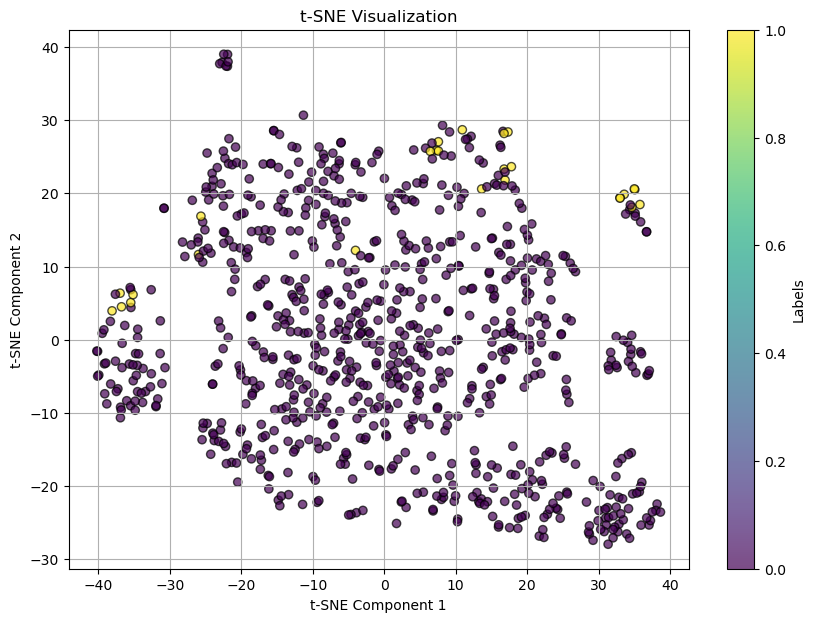

Processing WGAN


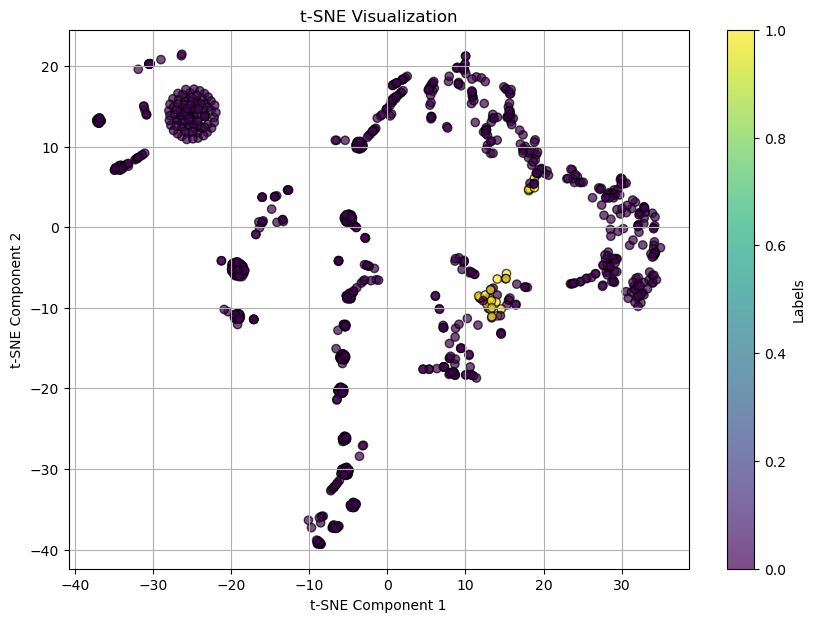

Processing GAN


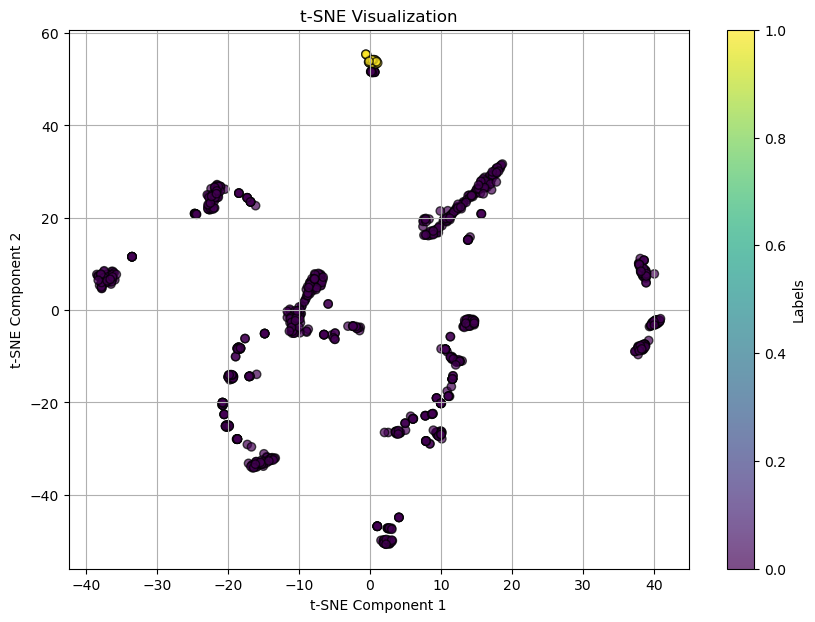

Processing CCR-GAN


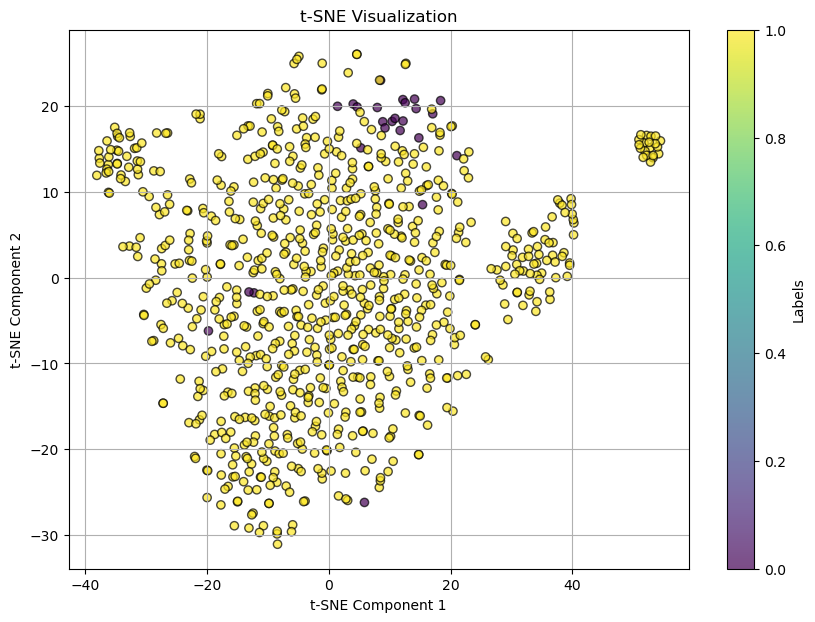

Processing medGAN


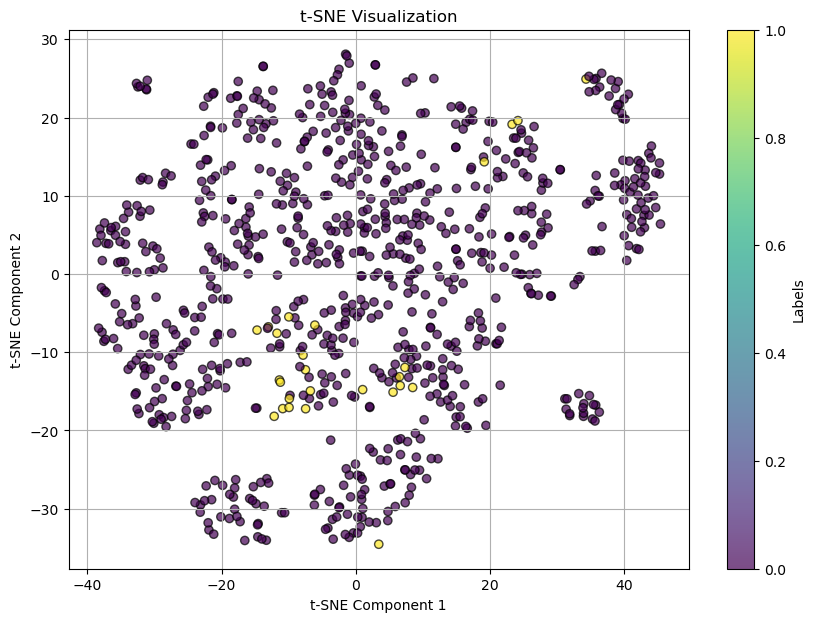

Processing DPGAN


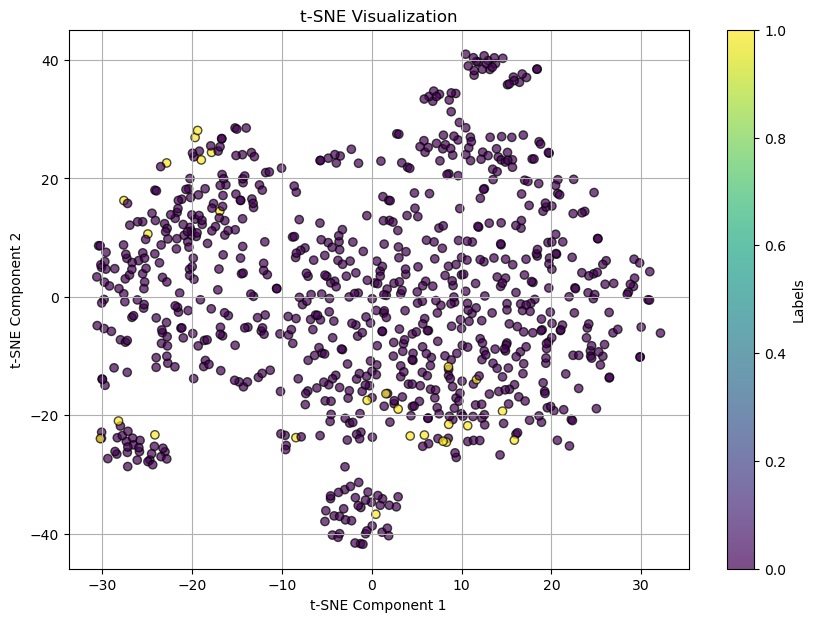

Processing Real dataset A


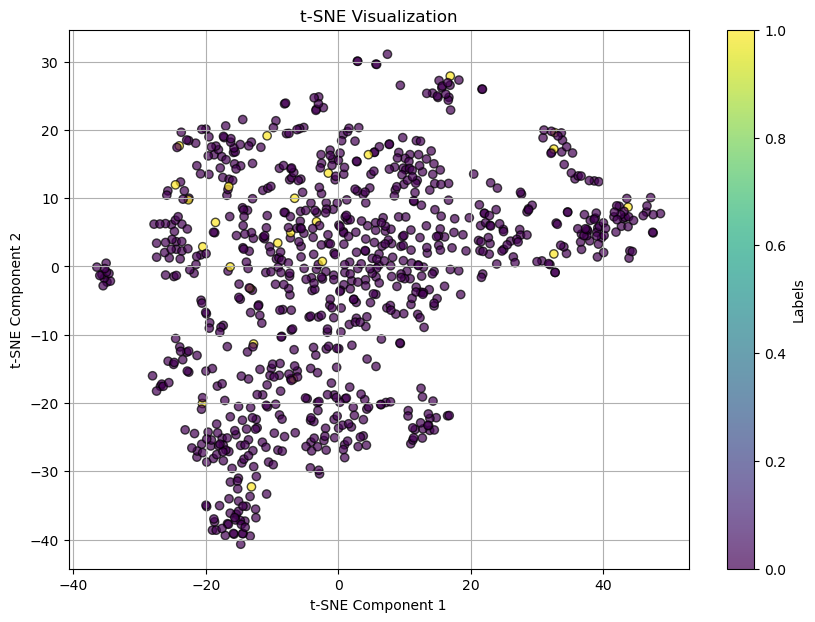

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

mapping = {'hd_train.npy':'Real dataset A','DPGantrainer.npy':'DPGAN','EMRWGantrainer.npy':'EMR-WGAN','GanTrainer.npy':'GAN','MedGantrainer.npy':'medGAN','WGantrainer.npy':'WGAN','cycleRGANTrainer.npy':'CCR-GAN'}

# Set folder paths
f_path = '../SynData/onehot_Binary_hd/syndata'

# Get list of files
filelist = [i for i in os.listdir(f_path) if i.endswith("npy") and not i.startswith("cycleAE")]
# print("filelist: ",filelist)
# Prepare data for t-SNE
all_data = []
file_names = []

for file_name in filelist:
    if file_name in mapping.keys():
        file_path = os.path.join(f_path, file_name)
        print(f'Processing {mapping[file_name]}')

        # Load data
        data = np.load(file_path)

        # 假设 data 的形状是 (n_samples, n_features + 1)
        # 分离特征和标签
        X = data[:, :-1]  # 特征数据
        y = data[:, -1]   # 标签数据

        # 标准化特征数据
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 应用 t-SNE
        tsne = TSNE(n_components=2, random_state=0)
        X_tsne = tsne.fit_transform(X_scaled)

        # 绘制 t-SNE 图
        plt.figure(figsize=(10, 7))
        scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k')
        plt.colorbar(scatter, label='Labels')
        plt.title('t-SNE Visualization')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.grid(True)
        plt.show()